In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from clip_ops.clip_ops import *
from trainer import *


In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

# v1, v2を[0, 1]の範囲で生成
x = np.linspace(0, 1.0, D)

# v3を複数の値でサンプリング（3次元可視化のため）
c = 1.0
v3_values = np.linspace(0, c, 5)  # v3を0, c/4, c/2, 3c/4, cの5つの値でサンプリング
print(f'v3_values: {v3_values}')

cfg = additive_1x3_constrained_c1_config.cfg
cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.save_output = True


v3_values: [0.   0.25 0.5  0.75 1.  ]


In [4]:
Net = additive_net.Net
Generator = constrained_3item_generator.Generator
clip_op_lambda = (lambda x: clip_op_constrained_3item(x, c=cfg.c))
Trainer = trainer.Trainer


In [5]:
# 各v3値に対してテストデータを生成し、推論を実行
# 各v3値での結果を保存
alloc_dict = {}
pay_dict = {}

for v3_val in v3_values:
    # 3財のテストデータを生成: [v1, v2, v3]
    X_tst = np.stack([v.flatten() for v in np.meshgrid(x, x)], axis=-1)
    # v3を固定値で追加
    X_tst = np.concatenate([X_tst, np.full((X_tst.shape[0], 1), v3_val)], axis=-1)
    # regretNet用に形状を変換: [batch_size, num_agents, num_items]
    X_tst = np.expand_dims(X_tst, 1)  # [batch_size, 1, 3]
    
    # 推論を実行（各v3値ごとに新しいnetとtrainerを作成）
    net = Net(cfg)
    m = Trainer(cfg, "test", net, clip_op_lambda)
    generator = Generator(cfg, 'test', X_tst)
    cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
    m.test(generator)
    
    # 結果を即座に読み込み（次のテストで上書きされる前に保存）
    alloc_file = os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")
    pay_file = os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")
    
    # ファイルが存在することを確認
    if os.path.exists(alloc_file) and os.path.exists(pay_file):
        alloc = np.load(alloc_file)  # [D*D, num_agents, num_items] -> [D*D, 1, 3]
        pay = np.load(pay_file)  # [D*D, num_agents] -> [D*D, 1]
        
        # 単一bidderの場合、形状を変換
        alloc = alloc[:, 0, :].reshape(D, D, 3)  # [D, D, 3]
        pay = pay[:, 0].reshape(D, D)  # [D, D]
        
        alloc_dict[v3_val] = alloc.copy()  # コピーを作成
        pay_dict[v3_val] = pay.copy()  # コピーを作成
        print(f"Completed v3 = {v3_val:.2f}")
    else:
        print(f"Error: Files not found for v3 = {v3_val:.2f}")


2025-11-13 10:58:03,707:INFO:TEST BATCH-0: t = 0.0030, Revenue: 0.108041, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,711:INFO:TEST BATCH-1: t = 0.0058, Revenue: 0.109144, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,715:INFO:TEST BATCH-2: t = 0.0091, Revenue: 0.110246, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,718:INFO:TEST BATCH-3: t = 0.0113, Revenue: 0.111350, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,721:INFO:TEST BATCH-4: t = 0.0144, Revenue: 0.112457, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,726:INFO:TEST BATCH-5: t = 0.0179, Revenue: 0.113572, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,729:INFO:TEST BATCH-6: t = 0.0207, Revenue: 0.114694, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,734:INFO:TEST BATCH-7: t = 0.0251, Revenue: 0.115826, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,738:INFO:TEST BATCH-8: t = 0.0276, Revenue: 0.116968, Regret: 0.000000, IRP: 0.000000
2025-11-13 10:58:03,742:INFO:TEST BATCH-9: t =

Completed v3 = 0.00


2025-11-13 10:58:04,696:INFO:TEST BATCH-52: t = 0.1351, Revenue: 0.398680, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:04,696:INFO:TEST BATCH-52: t = 0.1351, Revenue: 0.398680, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:04,699:INFO:TEST BATCH-53: t = 0.1372, Revenue: 0.404889, Regret: 0.000039, IRP: 0.000000
2025-11-13 10:58:04,699:INFO:TEST BATCH-53: t = 0.1372, Revenue: 0.404889, Regret: 0.000039, IRP: 0.000000
2025-11-13 10:58:04,703:INFO:TEST BATCH-54: t = 0.1397, Revenue: 0.411111, Regret: 0.000015, IRP: 0.000000
2025-11-13 10:58:04,703:INFO:TEST BATCH-54: t = 0.1397, Revenue: 0.411111, Regret: 0.000015, IRP: 0.000000
2025-11-13 10:58:04,708:INFO:TEST BATCH-55: t = 0.1433, Revenue: 0.417342, Regret: 0.000008, IRP: 0.000000
2025-11-13 10:58:04,708:INFO:TEST BATCH-55: t = 0.1433, Revenue: 0.417342, Regret: 0.000008, IRP: 0.000000
2025-11-13 10:58:04,713:INFO:TEST BATCH-56: t = 0.1465, Revenue: 0.423579, Regret: 0.000028, IRP: 0.000000
2025-11-13 10:58:04,713:INFO:TEST BAT

Completed v3 = 0.25


2025-11-13 10:58:05,585:INFO:TEST BATCH-36: t = 0.1375, Revenue: 0.612106, Regret: 0.000078, IRP: 0.000000
2025-11-13 10:58:05,585:INFO:TEST BATCH-36: t = 0.1375, Revenue: 0.612106, Regret: 0.000078, IRP: 0.000000
2025-11-13 10:58:05,585:INFO:TEST BATCH-36: t = 0.1375, Revenue: 0.612106, Regret: 0.000078, IRP: 0.000000
2025-11-13 10:58:05,593:INFO:TEST BATCH-37: t = 0.1418, Revenue: 0.618058, Regret: 0.000017, IRP: 0.000000
2025-11-13 10:58:05,593:INFO:TEST BATCH-37: t = 0.1418, Revenue: 0.618058, Regret: 0.000017, IRP: 0.000000
2025-11-13 10:58:05,593:INFO:TEST BATCH-37: t = 0.1418, Revenue: 0.618058, Regret: 0.000017, IRP: 0.000000
2025-11-13 10:58:05,601:INFO:TEST BATCH-38: t = 0.1468, Revenue: 0.624003, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:05,601:INFO:TEST BATCH-38: t = 0.1468, Revenue: 0.624003, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:05,601:INFO:TEST BATCH-38: t = 0.1468, Revenue: 0.624003, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:05,606:INFO:TEST BAT

Completed v3 = 0.50


2025-11-13 10:58:06,782:INFO:TEST BATCH-30: t = 0.1161, Revenue: 0.876313, Regret: 0.000011, IRP: 0.000000
2025-11-13 10:58:06,782:INFO:TEST BATCH-30: t = 0.1161, Revenue: 0.876313, Regret: 0.000011, IRP: 0.000000
2025-11-13 10:58:06,782:INFO:TEST BATCH-30: t = 0.1161, Revenue: 0.876313, Regret: 0.000011, IRP: 0.000000
2025-11-13 10:58:06,782:INFO:TEST BATCH-30: t = 0.1161, Revenue: 0.876313, Regret: 0.000011, IRP: 0.000000
2025-11-13 10:58:06,794:INFO:TEST BATCH-31: t = 0.1220, Revenue: 0.882123, Regret: 0.000010, IRP: 0.000000
2025-11-13 10:58:06,794:INFO:TEST BATCH-31: t = 0.1220, Revenue: 0.882123, Regret: 0.000010, IRP: 0.000000
2025-11-13 10:58:06,794:INFO:TEST BATCH-31: t = 0.1220, Revenue: 0.882123, Regret: 0.000010, IRP: 0.000000
2025-11-13 10:58:06,794:INFO:TEST BATCH-31: t = 0.1220, Revenue: 0.882123, Regret: 0.000010, IRP: 0.000000
2025-11-13 10:58:06,800:INFO:TEST BATCH-32: t = 0.1258, Revenue: 0.887930, Regret: 0.000014, IRP: 0.000000
2025-11-13 10:58:06,800:INFO:TEST BAT

Completed v3 = 0.75


2025-11-13 10:58:07,897:INFO:TEST BATCH-20: t = 0.1017, Revenue: 1.102311, Regret: 0.000001, IRP: 0.000000
2025-11-13 10:58:07,897:INFO:TEST BATCH-20: t = 0.1017, Revenue: 1.102311, Regret: 0.000001, IRP: 0.000000
2025-11-13 10:58:07,897:INFO:TEST BATCH-20: t = 0.1017, Revenue: 1.102311, Regret: 0.000001, IRP: 0.000000
2025-11-13 10:58:07,908:INFO:TEST BATCH-21: t = 0.1086, Revenue: 1.106749, Regret: 0.000025, IRP: 0.000000
2025-11-13 10:58:07,908:INFO:TEST BATCH-21: t = 0.1086, Revenue: 1.106749, Regret: 0.000025, IRP: 0.000000
2025-11-13 10:58:07,908:INFO:TEST BATCH-21: t = 0.1086, Revenue: 1.106749, Regret: 0.000025, IRP: 0.000000
2025-11-13 10:58:07,908:INFO:TEST BATCH-21: t = 0.1086, Revenue: 1.106749, Regret: 0.000025, IRP: 0.000000
2025-11-13 10:58:07,908:INFO:TEST BATCH-21: t = 0.1086, Revenue: 1.106749, Regret: 0.000025, IRP: 0.000000
2025-11-13 10:58:07,917:INFO:TEST BATCH-22: t = 0.1128, Revenue: 1.111057, Regret: 0.000033, IRP: 0.000000
2025-11-13 10:58:07,917:INFO:TEST BAT

Completed v3 = 1.00


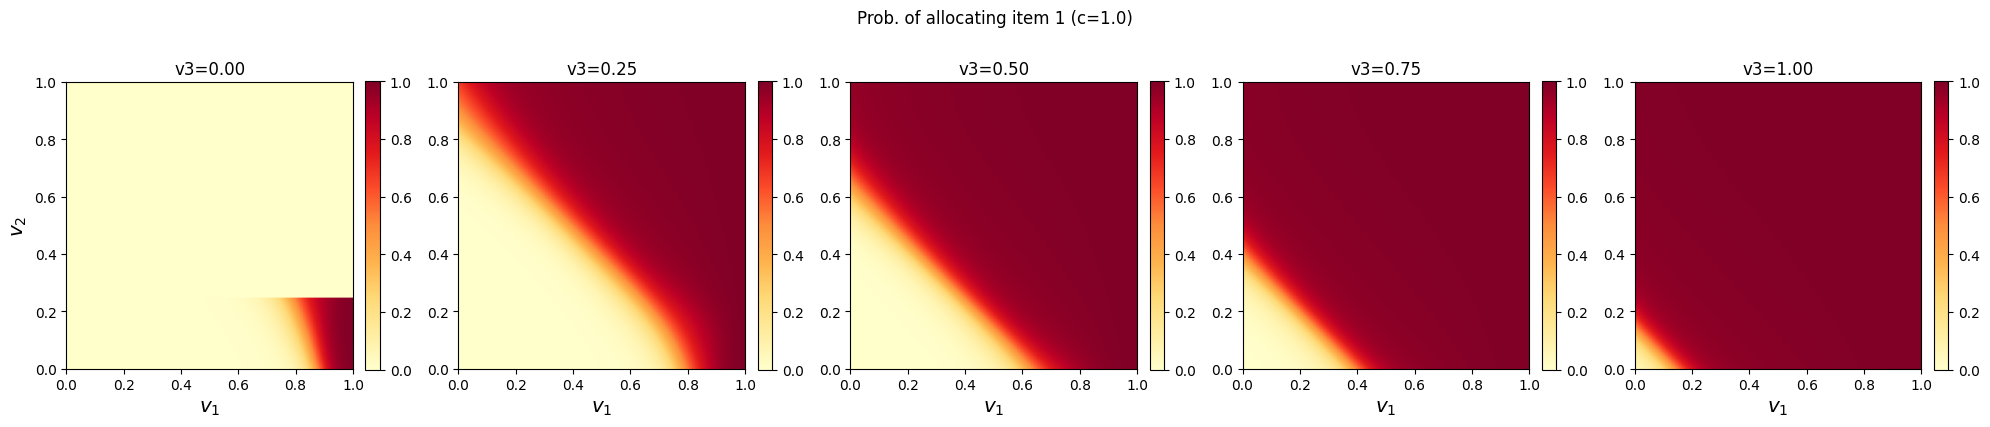

In [6]:
# 財1の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 0], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle(f'Prob. of allocating item 1 (c={c})', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


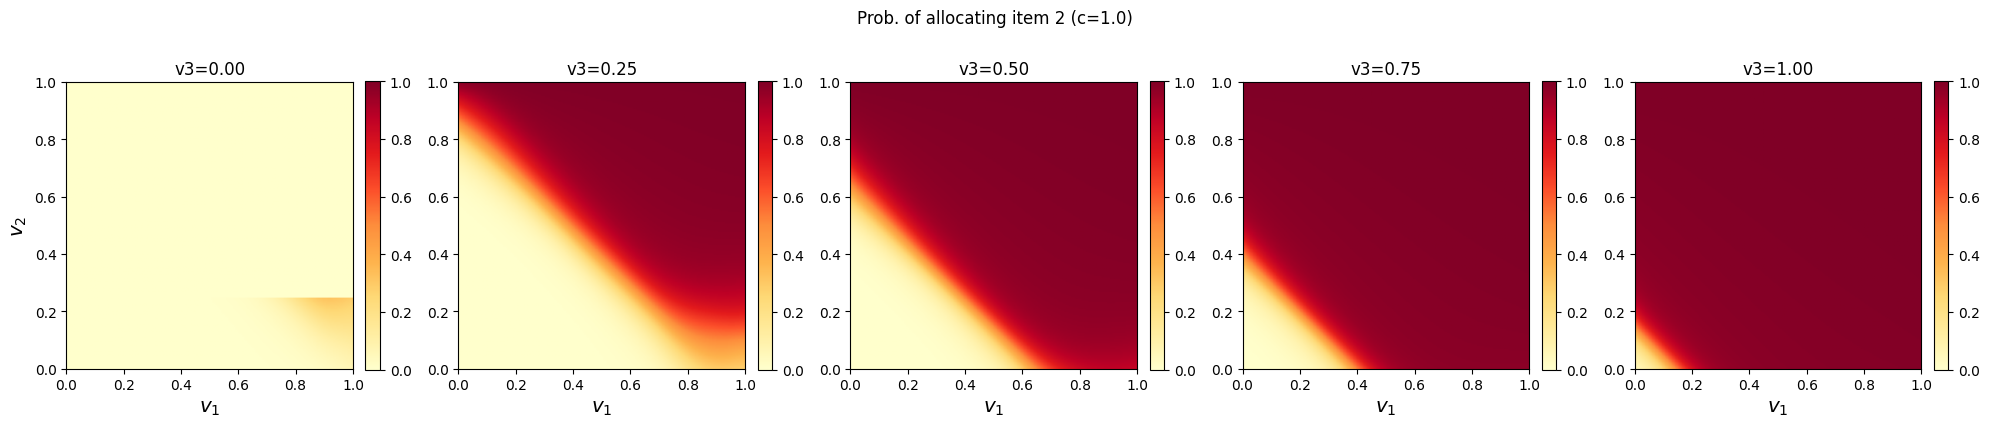

In [7]:
# 財2の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 1], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle(f'Prob. of allocating item 2 (c={c})', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


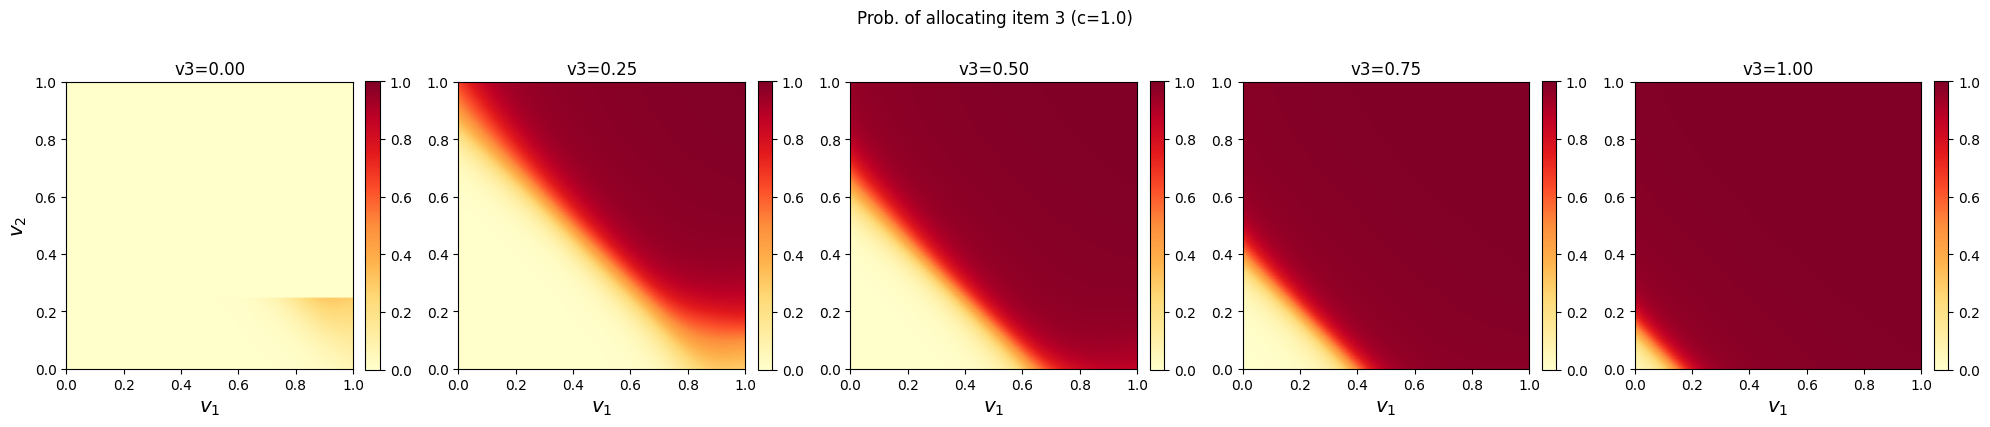

In [8]:
# 財3の配分確率を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(alloc[::-1, :, 2], extent=[0, 1, 0, 1], vmin=0.0, vmax=1.0, cmap='YlOrRd')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle(f'Prob. of allocating item 3 (c={c})', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'alloc3_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


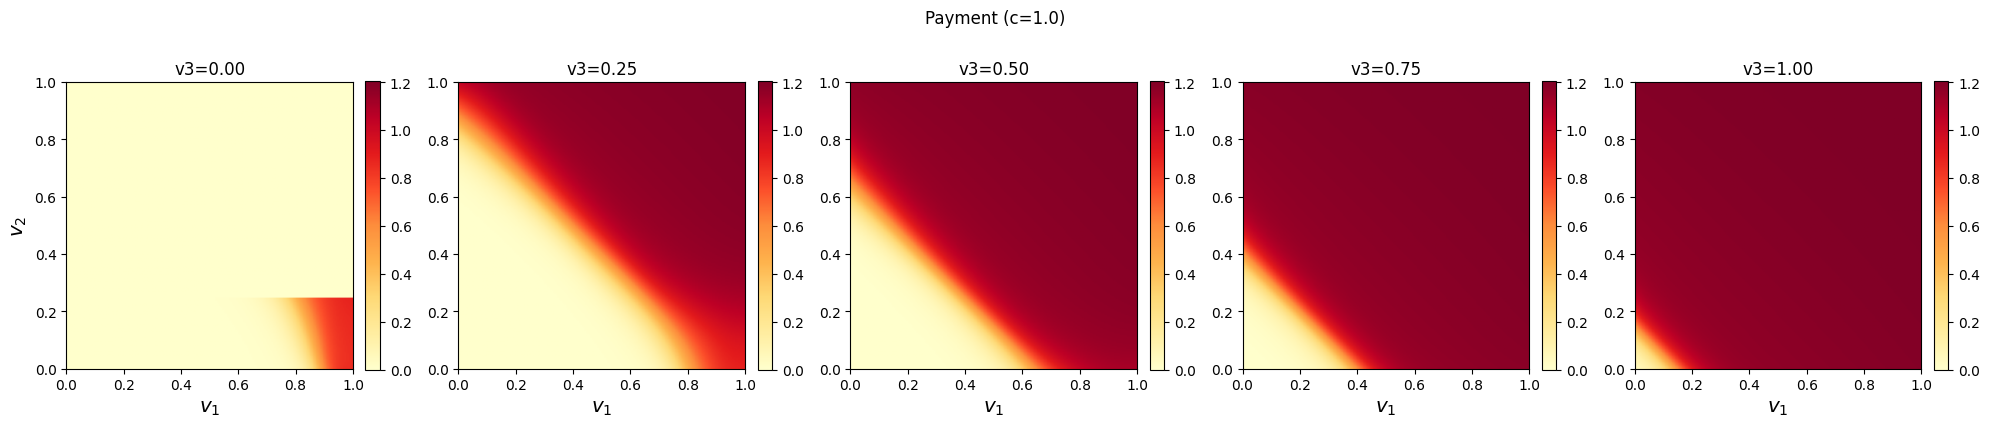

In [9]:
# Paymentを複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})

# すべてのv3値でのpaymentの最大値と最小値を計算（色スケール統一のため）
pay_min = min([np.min(pay_dict[v3_val]) for v3_val in v3_values])
pay_max = max([np.max(pay_dict[v3_val]) for v3_val in v3_values])

fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    pay = pay_dict[v3_val]
    ax = axes[idx]
    img = ax.imshow(pay[::-1, :], extent=[0, 1, 0, 1], cmap='YlOrRd', vmin=pay_min, vmax=pay_max)
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle(f'Payment (c={c})', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'pay_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


In [10]:
# 制約違反の確認（各v3値に対して）
print("Constraint Violation Statistics for each v3:")
for v3_val in v3_values:
    alloc = alloc_dict[v3_val]
    # 下界: max(0, alloc1 + alloc2 - 1) <= alloc3
    # 上界: alloc3 <= min(alloc1, alloc2)
    lower_bound = np.maximum(0, alloc[:, :, 0] + alloc[:, :, 1] - 1)
    upper_bound = np.minimum(alloc[:, :, 0], alloc[:, :, 1])
    lower_violation = np.maximum(0, lower_bound - alloc[:, :, 2])
    upper_violation = np.maximum(0, alloc[:, :, 2] - upper_bound)
    constraint_violation = lower_violation + upper_violation
    
    print(f"\nv3 = {v3_val:.2f}:")
    print(f"  Min: {np.min(constraint_violation):.6f}")
    print(f"  Max: {np.max(constraint_violation):.6f}")
    print(f"  Mean: {np.mean(constraint_violation):.6f}")
    print(f"  Number of violations: {np.sum(constraint_violation > 1e-6)}")


Constraint Violation Statistics for each v3:

v3 = 0.00:
  Min: 0.000000
  Max: 0.001042
  Mean: 0.000001
  Number of violations: 1648

v3 = 0.25:
  Min: 0.000000
  Max: 0.009238
  Mean: 0.000081
  Number of violations: 2560

v3 = 0.50:
  Min: 0.000000
  Max: 0.005329
  Mean: 0.000043
  Number of violations: 2634

v3 = 0.75:
  Min: 0.000000
  Max: 0.000899
  Mean: 0.000031
  Number of violations: 4392

v3 = 1.00:
  Min: 0.000000
  Max: 0.001632
  Mean: 0.000447
  Number of violations: 32691


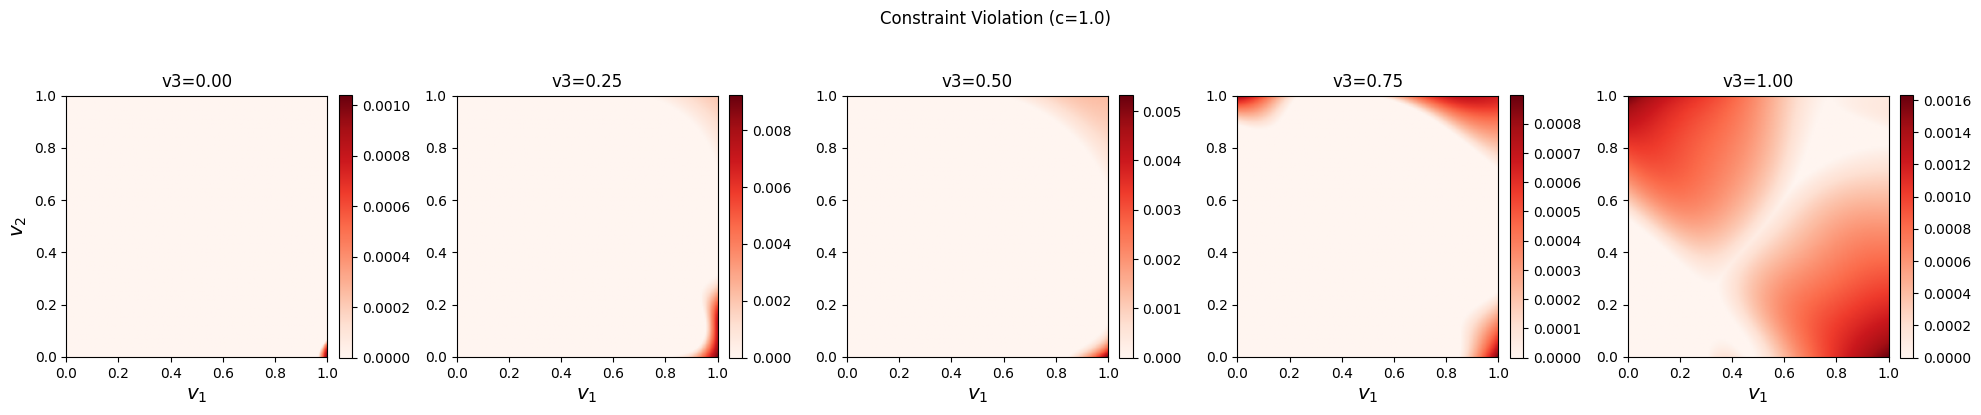

In [11]:
# 制約違反を複数のv3値で可視化
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, axes = plt.subplots(ncols=len(v3_values), nrows=1, figsize=(4*len(v3_values), 4))

for idx, v3_val in enumerate(v3_values):
    alloc = alloc_dict[v3_val]
    lower_bound = np.maximum(0, alloc[:, :, 0] + alloc[:, :, 1] - 1)
    upper_bound = np.minimum(alloc[:, :, 0], alloc[:, :, 1])
    lower_violation = np.maximum(0, lower_bound - alloc[:, :, 2])
    upper_violation = np.maximum(0, alloc[:, :, 2] - upper_bound)
    constraint_violation = lower_violation + upper_violation
    
    ax = axes[idx]
    img = ax.imshow(constraint_violation[::-1, :], extent=[0, 1, 0, 1], cmap='Reds')
    ax.set_xlabel(r'$v_1$')
    if idx == 0:
        ax.set_ylabel(r'$v_2$')
    ax.set_title(f'v3={v3_val:.2f}')
    plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

plt.suptitle(f'Constraint Violation (c={c})', y=1.02)
plt.tight_layout()

if save_plot:
    plt.savefig(os.path.join(cfg.dir_name, 'constraint_violation_3d.pdf'), bbox_inches='tight', pad_inches=0.05)


In [12]:
# Payment statistics（各v3値に対して）
v_max = x[-1]
print("Payment Statistics for each v3:")
for v3_val in v3_values:
    pay = pay_dict[v3_val]
    print(f"\nv3 = {v3_val:.2f}:")
    print(f"  Min: {np.min(pay):.6f}")
    print(f"  Max: {np.max(pay):.6f}")
    print(f"  Mean: {np.mean(pay):.6f}")
    print(f"  Median: {np.median(pay):.6f}")
    print(f"  Std: {np.std(pay):.6f}")
    print(f"  Payment at selected points:")
    print(f"    pay[0, 0] (v1=0, v2=0): {pay[0, 0]:.6f}")
    print(f"    pay[D//2, D//2] (v1={v_max/2:.1f}, v2={v_max/2:.1f}): {pay[D//2, D//2]:.6f}")
    print(f"    pay[-1, -1] (v1={v_max:.1f}, v2={v_max:.1f}): {pay[-1, -1]:.6f}")


Payment Statistics for each v3:

v3 = 0.00:
  Min: 0.000000
  Max: 0.878156
  Mean: 0.034808
  Median: 0.000000
  Std: 0.148530
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000000
    pay[D//2, D//2] (v1=0.5, v2=0.5): 0.000000
    pay[-1, -1] (v1=1.0, v2=1.0): 0.000000

v3 = 0.25:
  Min: 0.000003
  Max: 1.195135
  Mean: 0.682191
  Median: 0.926437
  Std: 0.503011
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000003
    pay[D//2, D//2] (v1=0.5, v2=0.5): 0.973161
    pay[-1, -1] (v1=1.0, v2=1.0): 1.195135

v3 = 0.50:
  Min: 0.000022
  Max: 1.199887
  Mean: 0.913008
  Median: 1.156547
  Std: 0.433432
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000022
    pay[D//2, D//2] (v1=0.5, v2=0.5): 1.158581
    pay[-1, -1] (v1=1.0, v2=1.0): 1.199887

v3 = 0.75:
  Min: 0.000347
  Max: 1.202454
  Mean: 1.078733
  Median: 1.178245
  Std: 0.286473
  Payment at selected points:
    pay[0, 0] (v1=0, v2=0): 0.000347
    pay[D//2, D//2] (v1=0.5, v2=0.5): 1.177848